In [1]:
import mne
import numpy as np
import pandas as pd
from PyEMD import EMD
import seaborn as sns
from PyEMD import EEMD
from scipy import signal
import matplotlib.pyplot as plt
import scipy.interpolate as spi
from sklearn.cluster import KMeans
from scipy.signal import butter, filtfilt
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA,FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pyts.decomposition import SingularSpectrumAnalysis


#!pip install mne
#! pip install pyts
#pip install pywavelets
#!pip install EMD-signal
# from pyhht.emd import EMD



In [2]:
data = pd.read_csv("sample.csv")
data.head()

Timestamp  OriginalTimestamp  EEG.Counter  EEG.Interpolated      EEG.AF3  \
0  1732009121         1732009121           45                 0  4382.436035   
1  1732009121         1732009121           46                 0  4376.153809   
2  1732009121         1732009121           47                 0  4375.641113   
3  1732009121         1732009121           48                 0  4381.666504   
4  1732009121         1732009121           49                 0  4380.769043   

        EEG.F7       EEG.F3      EEG.FC5       EEG.T7       EEG.P7  ...  \
0  4422.820313  4372.692383  4395.897461  4414.871582  4360.641113  ...   
1  4411.794922  4372.307617  4389.358887  4412.692383  4357.179688  ...   
2  4409.102539  4371.794922  4388.974121  4414.743652  4355.512695  ...   
3  4414.743652  4374.487305  4395.641113  4417.436035  4360.897461  ...   
4  4412.051270  4376.025879  4393.333496  4416.666504  4358.205078  ...   

   POW.F8.Theta  POW.F8.Alpha  POW.F8.BetaL  POW.F8.BetaH  POW.F8.Gamma  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   POW.AF4.Theta  POW.AF4.Alpha  POW.AF4.BetaL  POW.AF4.BetaH  POW.AF4.Gamma  
0            NaN            NaN            NaN            NaN            NaN  
1            NaN            NaN            NaN            NaN            NaN  
2            NaN            NaN            NaN            NaN            NaN  
3            NaN            NaN            NaN            NaN            NaN  
4            NaN            NaN            NaN            NaN            NaN  

[5 rows x 183 columns]

selected the features


In [3]:
# selected the features
base_channels = ['F7', 'AF3', 'F3', 'F4', 'AF4', 'F8', 'T7', 'T8']

# Ensure the dataset contains a Timestamp column
if 'Timestamp' not in data.columns:
    raise ValueError("The dataset does not contain a 'Timestamp' column.")

# Build a list of relevant columns
relevant_columns = ['Timestamp']  # Start with the timestamp
for channel in base_channels:
    relevant_columns.extend(
        [col for col in data.columns if channel in col]
    )

# Extract the filtered data
filtered_data = data[relevant_columns]

# Display the first few rows
print(filtered_data.head())


    Timestamp       EEG.F7  CQ.F7  EQ.F7  POW.F7.Theta  POW.F7.Alpha  \
0  1732009121  4422.820313      4    NaN           NaN           NaN   
1  1732009121  4411.794922      4    NaN           NaN           NaN   
2  1732009121  4409.102539      4    NaN           NaN           NaN   
3  1732009121  4414.743652      4    NaN           NaN           NaN   
4  1732009121  4412.051270      4    NaN           NaN           NaN   

   POW.F7.BetaL  POW.F7.BetaH  POW.F7.Gamma      EEG.AF3  ...  POW.T7.BetaH  \
0           NaN           NaN           NaN  4382.436035  ...           NaN   
1           NaN           NaN           NaN  4376.153809  ...           NaN   
2           NaN           NaN           NaN  4375.641113  ...           NaN   
3           NaN           NaN           NaN  4381.666504  ...           NaN   
4           NaN           NaN           NaN  4380.769043  ...           NaN   

   POW.T7.Gamma       EEG.T8  CQ.T8  EQ.T8  POW.T8.Theta  POW.T8.Alpha  \
0           NaN  4

In [4]:
#saving the extracted data to a csv file 
#filtered_data.to_csv("splitted_channels.csv", index=False)
splitted_channels=pd.read_csv("splitted_channels.csv")

In [5]:
#replaced my null values 
splitted_channels = splitted_channels.interpolate(method='linear', axis=0)


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Select all numeric columns in the dataframe
numeric_columns = splitted_channels.select_dtypes(include=['float64', 'int64']).columns

# Instantiate a StandardScaler
scaler = StandardScaler()

# Normalize all numeric columns
splitted_channels[numeric_columns] = scaler.fit_transform(splitted_channels[numeric_columns])

# Now the entire DataFrame has been normalized


In [7]:
splitted_channels

Timestamp    EEG.F7  CQ.F7     EQ.F7  POW.F7.Theta  POW.F7.Alpha  \
0     -1.697133  1.718041    0.0       NaN           NaN           NaN   
1     -1.697133  1.432719    0.0       NaN           NaN           NaN   
2     -1.697133  1.363044    0.0       NaN           NaN           NaN   
3     -1.697133  1.509028    0.0       NaN           NaN           NaN   
4     -1.697133  1.439353    0.0       NaN           NaN           NaN   
...         ...       ...    ...       ...           ...           ...   
5607   1.701979 -0.139896    0.0  0.315783     -0.571593     -1.087048   
5608   1.701979 -0.076868    0.0  0.315783     -0.582968     -1.091711   
5609   1.701979 -0.136586    0.0  0.315783     -0.582968     -1.091711   
5610   1.701979 -0.192993    0.0  0.315783     -0.582968     -1.091711   
5611   1.701979 -0.136586    0.0  0.315783     -0.582968     -1.091711   

      POW.F7.BetaL  POW.F7.BetaH  POW.F7.Gamma   EEG.AF3  ...  POW.T7.BetaH  \
0              NaN           NaN           NaN  0.421288  ...           NaN   
1              NaN           NaN           NaN  0.221669  ...           NaN   
2              NaN           NaN           NaN  0.205378  ...           NaN   
3              NaN           NaN           NaN  0.396836  ...           NaN   
4              NaN           NaN           NaN  0.368319  ...           NaN   
...            ...           ...           ...       ...  ...           ...   
5607      0.003075     -0.290391     -0.708363  0.510904  ...     -0.240685   
5608     -0.002442     -0.288503     -0.708160  0.673861  ...     -0.242231   
5609     -0.002442     -0.288503     -0.708160  0.751250  ...     -0.242231   
5610     -0.002442     -0.288503     -0.708160  0.645344  ...     -0.242231   
5611     -0.002442     -0.288503     -0.708160  0.686071  ...     -0.242231   

      POW.T7.Gamma    EEG.T8  CQ.T8   EQ.T8  POW.T8.Theta  POW.T8.Alpha  \
0              NaN -2.196782    0.0     NaN           NaN           NaN   
1              NaN -2.481738    0.0     NaN           NaN           NaN   
2              NaN -2.170868    0.0     NaN           NaN           NaN   
3              NaN -1.765058    0.0     NaN           NaN           NaN   
4              NaN -2.127722    0.0     NaN           NaN           NaN   
...            ...       ...    ...     ...           ...           ...   
5607      0.020069  0.315889    0.0  0.1889     -0.763678     -0.830261   
5608      0.021904  0.471307    0.0  0.1889     -0.772563     -0.838606   
5609      0.021904  0.307240    0.0  0.1889     -0.772563     -0.838606   
5610      0.021904  0.566281    0.0  0.1889     -0.772563     -0.838606   
5611      0.021904  0.911680    0.0  0.1889     -0.772563     -0.838606   

      POW.T8.BetaL  POW.T8.BetaH  POW.T8.Gamma  
0              NaN           NaN           NaN  
1              NaN           NaN           NaN  
2              NaN           NaN           NaN  
3              NaN           NaN           NaN  
4              NaN           NaN           NaN  
...            ...           ...           ...  
5607     -0.863706     -0.596521     -0.449939  
5608     -0.867889     -0.597275     -0.448246  
5609     -0.867889     -0.597275     -0.448246  
5610     -0.867889     -0.597275     -0.448246  
5611     -0.867889     -0.597275     -0.448246  

[5612 rows x 81 columns]

In [8]:
# Assuming your dataset has a Timestamp column and EEG signal columns
if 'Timestamp' not in splitted_channels.columns:
    raise ValueError("The dataset does not contain a 'Timestamp' column.")

# Ensure Timestamp is in datetime format
splitted_channels['Timestamp'] = pd.to_datetime(splitted_channels['Timestamp'])

# Function to calculate sampling frequency for a single column
def calculate_sampling_frequency(timestamp_col):
    time_differences = timestamp_col.diff().dt.total_seconds()  # Calculate time differences
    average_time_interval = time_differences.dropna().mean()  # Average time interval in seconds
    return 1 / average_time_interval if average_time_interval else None  # Sampling frequency in Hz

# Create a dictionary to store the sampling frequency for each column
sampling_frequencies = {}

# Loop through EEG signal columns
eeg_columns = [col for col in splitted_channels.columns if col.startswith("EEG")]
for col in eeg_columns:
    # Calculate sampling frequency for the current column using its timestamps
    sampling_frequencies[col] = calculate_sampling_frequency(splitted_channels['Timestamp'])

# Display the sampling frequencies
for col, freq in sampling_frequencies.items():
    print(f"Sampling Frequency for {col}: {freq:.2f} Hz")


Sampling Frequency for EEG.F7: 2805500000000.00 Hz
Sampling Frequency for EEG.AF3: 2805500000000.00 Hz
Sampling Frequency for EEG.AF3.1: 2805500000000.00 Hz
Sampling Frequency for EEG.F3: 2805500000000.00 Hz
Sampling Frequency for EEG.F4: 2805500000000.00 Hz
Sampling Frequency for EEG.AF4: 2805500000000.00 Hz
Sampling Frequency for EEG.AF4.1: 2805500000000.00 Hz
Sampling Frequency for EEG.F8: 2805500000000.00 Hz
Sampling Frequency for EEG.T7: 2805500000000.00 Hz
Sampling Frequency for EEG.T8: 2805500000000.00 Hz


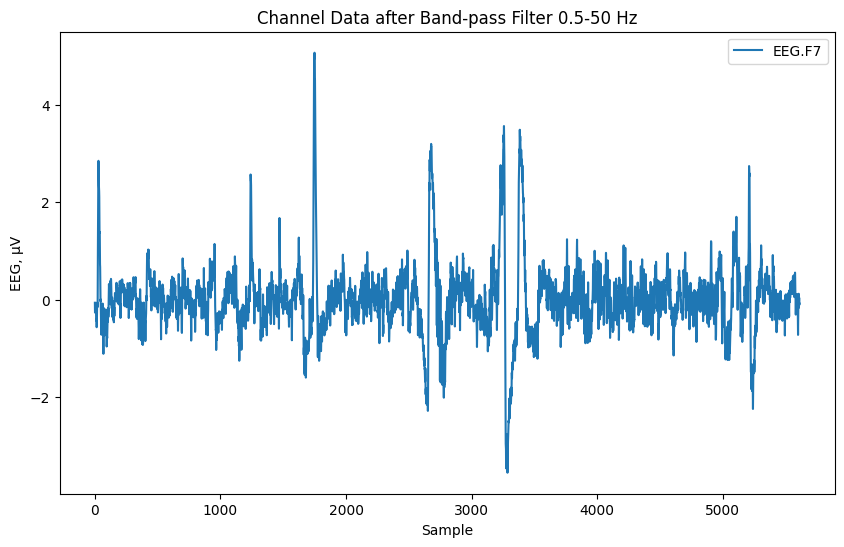

In [9]:
from scipy import signal
import matplotlib.pyplot as plt

def butter_highpass_filter(data, cutoff, nyq, order=5):
    """Butterworth high-pass filter."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

def butter_lowpass_filter(data, cutoff, nyq, order=5):
    """Butterworth low-pass filter."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Parameters
fps = 128  # Sampling frequency
cutoff_high = 0.5  # High-pass filter cutoff frequency (Hz)
cutoff_low = 50    # Low-pass filter cutoff frequency (Hz)
nyq = 0.5 * fps    # Nyquist frequency

# Select EEG columns
eeg_columns = [col for col in splitted_channels.columns if col.startswith("EEG")]

# Copy and scale data
filtered_data = splitted_channels.copy()
for col in eeg_columns:
    scaled_data = filtered_data[col]   # Scale to microvolts once
    highpassed = butter_highpass_filter(scaled_data, cutoff=cutoff_high, nyq=nyq,order=5)
    lowpassed = butter_lowpass_filter(highpassed, cutoff=cutoff_low, nyq=nyq,order=4)
    filtered_data[col] = lowpassed  # Replace with the filtered signal

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["EEG.AF3"], label=eeg_columns[0])
plt.title(f"Channel Data after Band-pass Filter {cutoff_high}-{cutoff_low} Hz")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.legend()
plt.show()


c:\Users\alsho\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\alsho\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


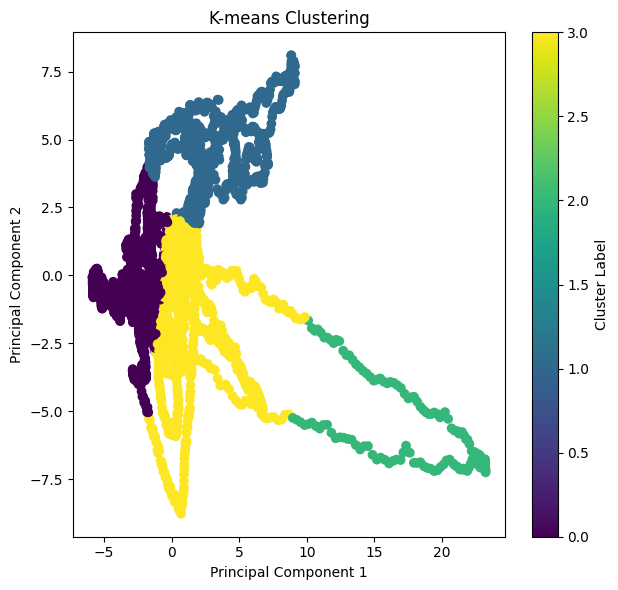

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame with EEG data
# Drop non-numeric columns (e.g., Timestamp) and handle any missing values
df_clean = filtered_data.drop(columns=['Timestamp'])
df_clean = df_clean.fillna(df_clean.mean())  # Impute missing values with column mean

# Normalize the data using Z-score normalization (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Dimensionality reduction: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# 1. K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose k=4 as an example
kmeans_labels = kmeans.fit_predict(X_reduced)

# Visualizing the results of K-means
plt.figure(figsize=(12, 6))

# K-means Clustering
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', label='K-means Clusters')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

# You can assign the cluster labels back to the dataframe
filtered_data['KMeans_Cluster'] = kmeans_labels


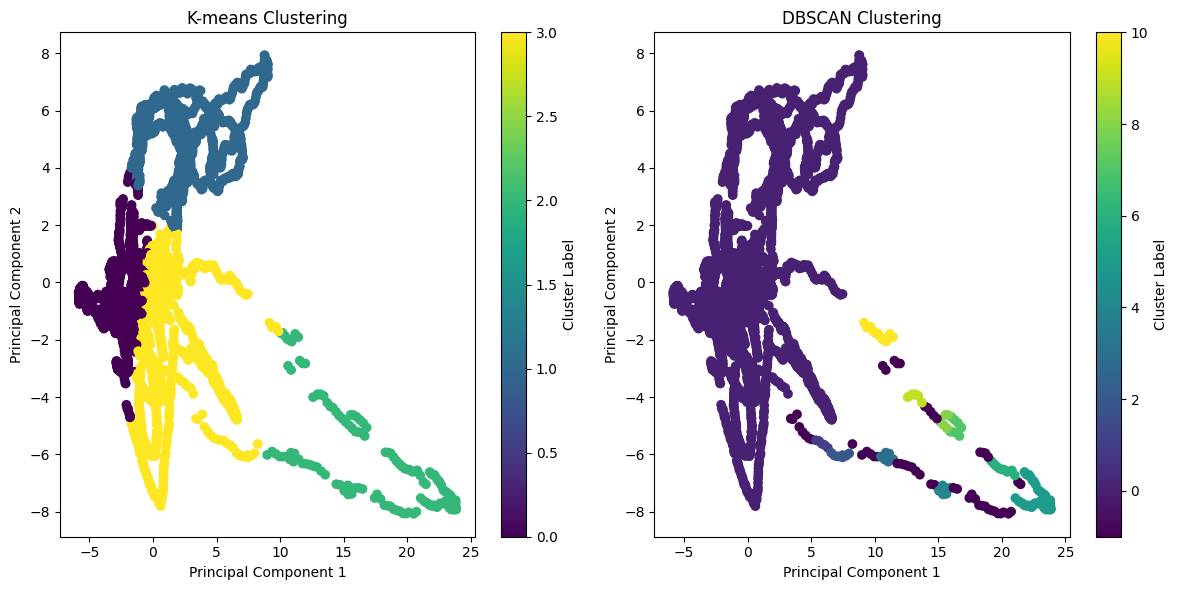

In [35]:
# Select only numeric columns
df_clean = filtered_data.select_dtypes(include=[np.number])

# Handle missing values by imputing with the column mean
df_clean = df_clean.fillna(df_clean.mean())

# Normalize the data using Z-score normalization (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Dimensionality reduction: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# 1. K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose k=4 as an example
kmeans_labels = kmeans.fit_predict(X_reduced)

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples for better clustering
dbscan_labels = dbscan.fit_predict(X_reduced)

# Visualizing the results of K-means
plt.figure(figsize=(12, 6))

# K-means Clustering
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', label='K-means Clusters')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

# DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels, cmap='viridis', label='DBSCAN Clusters')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

# You can assign the cluster labels back to the dataframe
filtered_data['KMeans_Cluster'] = kmeans_labels
filtered_data['DBSCAN_Cluster'] = dbscan_labels


In [12]:
import pandas as pd

# Assuming df contains your EEG data and clusters are stored in 'KMeans_Cluster' or 'DBSCAN_Cluster'

# Dynamically generate the list of frequency bands for all channels
# This assumes that your columns are of the format 'POW.<channel>.<band>'
frequency_bands = [col for col in filtered_data.columns if col.startswith('POW.')]

# 1. Calculate mean power for each frequency band in each cluster (for K-means)
kmeans_cluster_means = filtered_data.groupby('KMeans_Cluster')[frequency_bands].mean()

print("Mean Power for Each Cluster (K-means):")
print(kmeans_cluster_means)

# 2. Calculate mean power for each frequency band in each cluster (for DBSCAN)



Mean Power for Each Cluster (K-means):
                POW.F7.Theta  POW.F7.Alpha  POW.F7.BetaL  POW.F7.BetaH  \
KMeans_Cluster                                                           
0                  -0.288926     -0.550857     -0.493487     -0.401993   
1                  -0.426929      1.524831      0.221318      0.085149   
2                   3.314113      1.725788      3.767632      5.184919   
3                   0.394799     -0.129184      0.317906      0.148319   

                POW.F7.Gamma  POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  \
KMeans_Cluster                                                              
0                  -0.231343      -0.316991      -0.583625      -0.536223   
1                  -0.127649      -0.352044       1.850625       0.398579   
2                   5.378866      -0.190968      -0.086926       3.346829   
3                  -0.003599       0.662603      -0.115094       0.318987   

                POW.AF3.BetaH  POW.AF3.Gamma  ...  PO

In [16]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

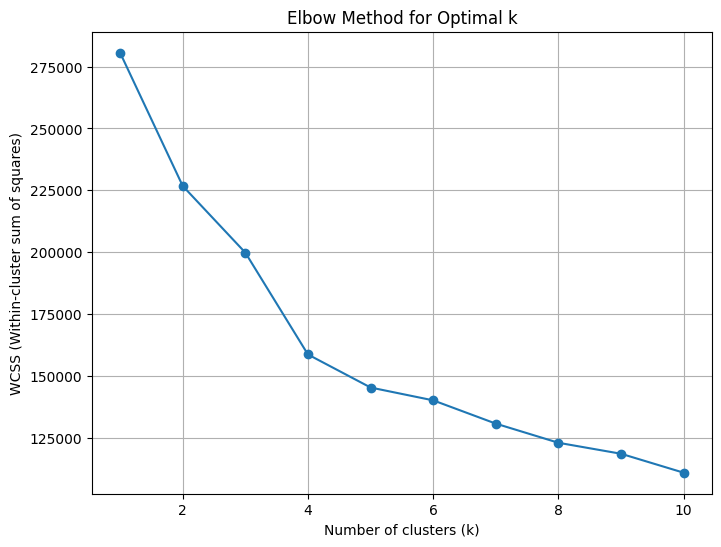

In [17]:
imputer = SimpleImputer(strategy='mean')
filtered_data[frequency_bands] = imputer.fit_transform(filtered_data[frequency_bands])

# Standardize the features for KMeans
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data[frequency_bands])

# Define the range of k (number of clusters) to test
k_range = range(1, 11)

# List to store the WCSS (Within-Cluster Sum of Squares) for each k
wcss = []

# Calculate WCSS for each value of k
for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(scaled_data)  # Use the scaled data
    wcss.append(kmeans_model.inertia_)  # inertia_ is the WCSS

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.grid(True)
plt.show()


In [18]:
# Let's assume the optimal number of clusters based on the elbow method is k_optimal
k_optimal = 4  # Replace with the number you find from the elbow plot

# Train KMeans with the optimal k
kmeans_model = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_model.fit(filtered_data[frequency_bands])  # Your data with frequency bands

# Assign KMeans cluster labels to your DataFrame
filtered_data['kmeans_cluster'] = kmeans_model.labels_

# You can map emotional states to clusters, for example:
kmeans_cluster_labels = {
    0: 'Calm',  
    1: 'Sad',   
    2: 'Happy', 
    3: 'Scared' 
}

filtered_data['KMeans_Cluster_Label'] = filtered_data['kmeans_cluster'].map(kmeans_cluster_labels)

# Check the updated DataFrame with cluster labels
print(filtered_data[['kmeans_cluster', 'KMeans_Cluster_Label']].head())


   kmeans_cluster KMeans_Cluster_Label
0               2                Happy
1               2                Happy
2               2                Happy
3               2                Happy
4               2                Happy


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
splitted_channels[frequency_bands] = imputer.fit_transform(splitted_channels[frequency_bands])

# Train KMeans model
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(splitted_channels[frequency_bands])

# Assign KMeans cluster labels to the DataFrame
splitted_channels['kmeans_cluster'] = kmeans_model.labels_

# Train DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(splitted_channels[frequency_bands])

# Assign DBSCAN cluster labels to the DataFrame
splitted_channels['dbscan_cluster'] = dbscan_model.labels_

# Check the results
print(splitted_channels[['kmeans_cluster', 'dbscan_cluster']].head())

# Manually define the emotional state labels based on the clusters
kmeans_cluster_labels = {
    0: 'Calm',         # Cluster 0 is Calm, low power in higher frequencies (Beta, Gamma)
    1: 'Sad',          # Cluster 1 is Sad, low power in most frequency bands
    2: 'Happy',        # Cluster 2 is Happy, high power in Beta and Gamma bands
    3: 'Scared'        # Cluster 3 is Scared, high power in specific frequency bands
}

dbscan_cluster_labels = {
    -1: 'Sad',         # Noise points are labeled as Sad (could be arbitrarily assigned)
    0: 'Calm',         # Cluster 0 is Calm, low power across most bands
    1: 'Happy',        # Cluster 1 is Happy, higher Beta/Gamma power
    2: 'Calm',         # Cluster 2 is Calm, low to medium power across frequency bands
    3: 'Scared',       # Cluster 3 is Scared, higher power in Beta/Gamma
    4: 'Happy',        # Cluster 4 is Happy, high Beta/Gamma
    5: 'Happy',        # Cluster 5 is Happy, high Beta/Gamma
    6: 'Scared',       # Cluster 6 is Scared, high power across Beta/Gamma
    7: 'Happy',        # Cluster 7 is Happy, high Beta/Gamma
    8: 'Sad',          # Cluster 8 is Sad, low to medium power
    9: 'Scared',       # Cluster 9 is Scared, high Beta/Gamma
    10: 'Happy'        # Cluster 10 is Happy, high Beta/Gamma
}

# Add the labels to your Da


   kmeans_cluster  dbscan_cluster
0               2               0
1               2               0
2               2               0
3               2               0
4               2               0


In [22]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for KMeans
kmeans_silhouette = silhouette_score(splitted_channels[frequency_bands], splitted_channels['kmeans_cluster'])

# Calculate silhouette score for DBSCAN
dbscan_silhouette = silhouette_score(splitted_channels[frequency_bands], splitted_channels['dbscan_cluster'])

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")


KMeans Silhouette Score: 0.3016095480001396
DBSCAN Silhouette Score: -0.23549617775406476


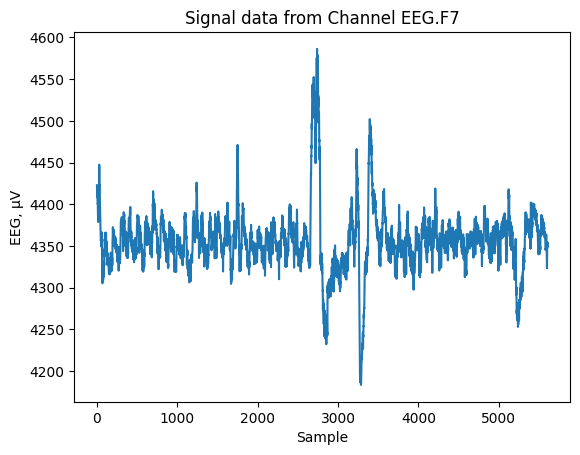

In [8]:
# select the data from the first channel for demo
channel_data = splitted_channels["EEG.F7"]
# plot the EEG data
plt.plot(channel_data)
plt.title("Signal data from Channel EEG.F7")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

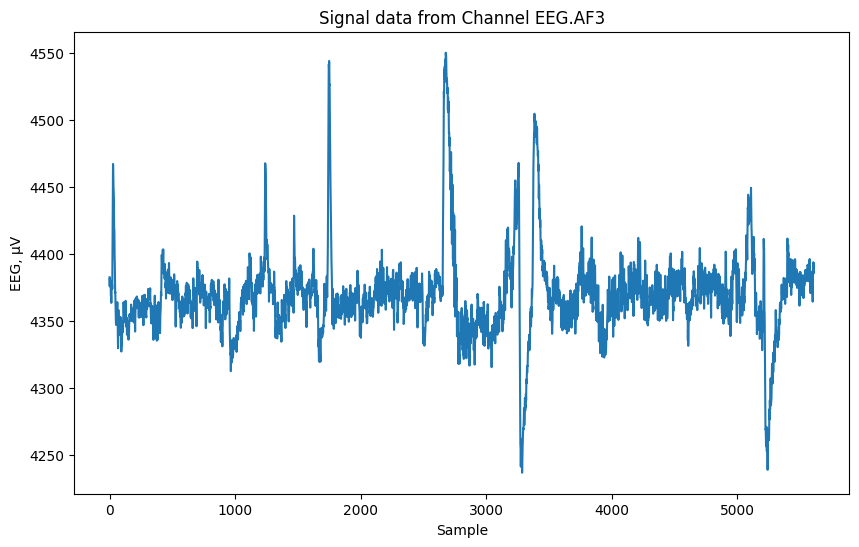

In [9]:
# select the data from the first channel for demo
channel_data = splitted_channels["EEG.AF3"]
# plot the EEG data
plt.figure(figsize=(10, 6))
plt.plot(channel_data)
plt.title("Signal data from Channel EEG.AF3")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

## Band Pass Filter


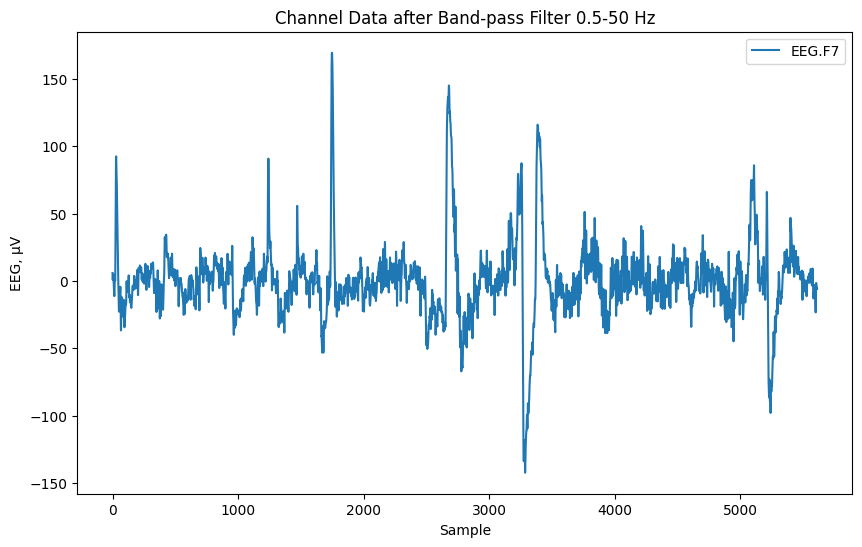

In [10]:
from scipy import signal
import matplotlib.pyplot as plt

def butter_highpass_filter(data, cutoff, nyq, order=5):
    """Butterworth high-pass filter."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

def butter_lowpass_filter(data, cutoff, nyq, order=5):
    """Butterworth low-pass filter."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Parameters
fps = 128  # Sampling frequency
cutoff_high = 0.5  # High-pass filter cutoff frequency (Hz)
cutoff_low = 50    # Low-pass filter cutoff frequency (Hz)
nyq = 0.5 * fps    # Nyquist frequency

# Select EEG columns
eeg_columns = [col for col in splitted_channels.columns if col.startswith("EEG")]

# Copy and scale data
filtered_data = splitted_channels.copy()
for col in eeg_columns:
    scaled_data = filtered_data[col]   # Scale to microvolts once
    highpassed = butter_highpass_filter(scaled_data, cutoff=cutoff_high, nyq=nyq,order=5)
    lowpassed = butter_lowpass_filter(highpassed, cutoff=cutoff_low, nyq=nyq,order=4)
    filtered_data[col] = lowpassed  # Replace with the filtered signal

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["EEG.AF3"], label=eeg_columns[0])
plt.title(f"Channel Data after Band-pass Filter {cutoff_high}-{cutoff_low} Hz")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.legend()
plt.show()


In [11]:
filtered_data["EEG.AF3"]

0       5.857785
1       1.883580
2       0.796485
3       2.485698
4       4.485610
          ...   
5607   -5.806018
5608   -5.637324
5609   -5.022644
5610   -5.059488
5611   -5.936241
Name: EEG.AF3, Length: 5612, dtype: float64

In [12]:
splitted_channels["EEG.AF3"]

0       4382.436035
1       4376.153809
2       4375.641113
3       4381.666504
4       4380.769043
           ...     
5607    4385.256348
5608    4390.384766
5609    4392.820313
5610    4389.487305
5611    4390.769043
Name: EEG.AF3, Length: 5612, dtype: float64

In [13]:
filtered_data

Timestamp     EEG.F7  CQ.F7  EQ.F7  POW.F7.Theta  \
0    1970-01-01 00:00:01.732009121  17.036000      4    NaN           NaN   
1    1970-01-01 00:00:01.732009121   9.592461      4    NaN           NaN   
2    1970-01-01 00:00:01.732009121   5.998119      4    NaN           NaN   
3    1970-01-01 00:00:01.732009121   6.223009      4    NaN           NaN   
4    1970-01-01 00:00:01.732009121   7.188595      4    NaN           NaN   
...                            ...        ...    ...    ...           ...   
5607 1970-01-01 00:00:01.732009164  -4.735248      4    4.0      1.483868   
5608 1970-01-01 00:00:01.732009164  -4.642599      4    4.0      1.455598   
5609 1970-01-01 00:00:01.732009164  -4.514226      4    4.0      1.455598   
5610 1970-01-01 00:00:01.732009164  -4.439938      4    4.0      1.455598   
5611 1970-01-01 00:00:01.732009164  -4.244384      4    4.0      1.455598   

      POW.F7.Alpha  POW.F7.BetaL  POW.F7.BetaH  POW.F7.Gamma   EEG.AF3  ...  \
0              NaN           NaN           NaN           NaN  5.857785  ...   
1              NaN           NaN           NaN           NaN  1.883580  ...   
2              NaN           NaN           NaN           NaN  0.796485  ...   
3              NaN           NaN           NaN           NaN  2.485698  ...   
4              NaN           NaN           NaN           NaN  4.485610  ...   
...            ...           ...           ...           ...       ...  ...   
5607      0.236462      0.527816      0.247972      0.109637 -5.806018  ...   
5608      0.230793      0.526019      0.248443      0.109664 -5.637324  ...   
5609      0.230793      0.526019      0.248443      0.109664 -5.022644  ...   
5610      0.230793      0.526019      0.248443      0.109664 -5.059488  ...   
5611      0.230793      0.526019      0.248443      0.109664 -5.936241  ...   

      POW.T7.BetaH  POW.T7.Gamma     EEG.T8  CQ.T8  EQ.T8  POW.T8.Theta  \
0              NaN           NaN -13.165653      4    NaN           NaN   
1              NaN           NaN -13.399969      4    NaN           NaN   
2              NaN           NaN -12.616365      4    NaN           NaN   
3              NaN           NaN -11.744529      4    NaN           NaN   
4              NaN           NaN -12.350025      4    NaN           NaN   
...            ...           ...        ...    ...    ...           ...   
5607      0.453146      0.419955 -13.005769      4    4.0      1.236297   
5608      0.452671      0.420349 -11.967867      4    4.0      1.228570   
5609      0.452671      0.420349  -9.735335      4    4.0      1.228570   
5610      0.452671      0.420349  -7.071163      4    4.0      1.228570   
5611      0.452671      0.420349  -3.969063      4    4.0      1.228570   

      POW.T8.Alpha  POW.T8.BetaL  POW.T8.BetaH  POW.T8.Gamma  
0              NaN           NaN           NaN           NaN  
1              NaN           NaN           NaN           NaN  
2              NaN           NaN           NaN           NaN  
3              NaN           NaN           NaN           NaN  
4              NaN           NaN           NaN           NaN  
...            ...           ...           ...           ...  
5607      0.706593      0.582462      0.431368      0.288711  
5608      0.691956      0.580674      0.431193      0.289004  
5609      0.691956      0.580674      0.431193      0.289004  
5610      0.691956      0.580674      0.431193      0.289004  
5611      0.691956      0.580674      0.431193      0.289004  

[5612 rows x 81 columns]

In [14]:

# Ensure the sampling frequency is properly calculated for the dataset
def calculate_sampling_frequency(timestamp_col):
    time_differences = timestamp_col.diff().dt.total_seconds()
    average_time_interval = time_differences.dropna().mean()
    return 1 / average_time_interval if average_time_interval else None



In [15]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis

# Remove datetime columns temporarily
filtered_data_numeric = filtered_data.select_dtypes(exclude=['datetime', 'timedelta'])

# Calculate SNR (Signal-to-Noise Ratio) for each component
snr = np.mean(filtered_data_numeric, axis=0) / np.std(filtered_data_numeric, axis=0)

# Calculate Kurtosis for each component
kurt = kurtosis(filtered_data_numeric, axis=0, nan_policy='omit')  # Avoid NaN issues

# Create a DataFrame to display SNR and Kurtosis for each component
filtered_data_metrics = pd.DataFrame({
    'SNR': snr,
    'Kurtosis': kurt
})

# Display the metrics for each ICA component
print(filtered_data_metrics)

# Identify invalid components (those with extremely high SNR or NaN kurtosis)
invalid_components = filtered_data_metrics[(filtered_data_metrics['SNR'] == np.inf) | (filtered_data_metrics['Kurtosis'].isna())]
print("Invalid Components:")
print(invalid_components)

# Valid components are those without NaN kurtosis and inf SNR
valid_components = filtered_data_metrics.dropna().loc[filtered_data_metrics['SNR'] != np.inf]
print("Valid Components:")
print(valid_components)


                   SNR  Kurtosis
EEG.F7       -0.009775  5.464356
CQ.F7              inf       NaN
EQ.F7         5.182786  8.695030
POW.F7.Theta  1.168665  9.026277
POW.F7.Alpha  1.281569  2.212373
...                ...       ...
POW.T8.Theta  2.185289  1.654501
POW.T8.Alpha  1.233104  9.712468
POW.T8.BetaL  2.226269 -0.681542
POW.T8.BetaH  2.452225  1.002814
POW.T8.Gamma  2.119562 -0.696996

[80 rows x 2 columns]
Invalid Components:
          SNR  Kurtosis
CQ.F7     inf       NaN
CQ.AF3    inf       NaN
CQ.AF3.1  inf       NaN
CQ.F3     inf       NaN
CQ.F4     inf       NaN
CQ.AF4    inf       NaN
EQ.F4     inf       NaN
EQ.AF4    inf       NaN
CQ.AF4.1  inf       NaN
EQ.AF4.1  inf       NaN
CQ.F8     inf       NaN
EQ.F8     inf       NaN
CQ.T7     inf       NaN
CQ.T8     inf       NaN
Valid Components:
                   SNR  Kurtosis
EEG.F7       -0.009775  5.464356
EQ.F7         5.182786  8.695030
POW.F7.Theta  1.168665  9.026277
POW.F7.Alpha  1.281569  2.212373
POW.F7.BetaL  1.61

c:\Users\alsho\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\shape_base.py:402: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))


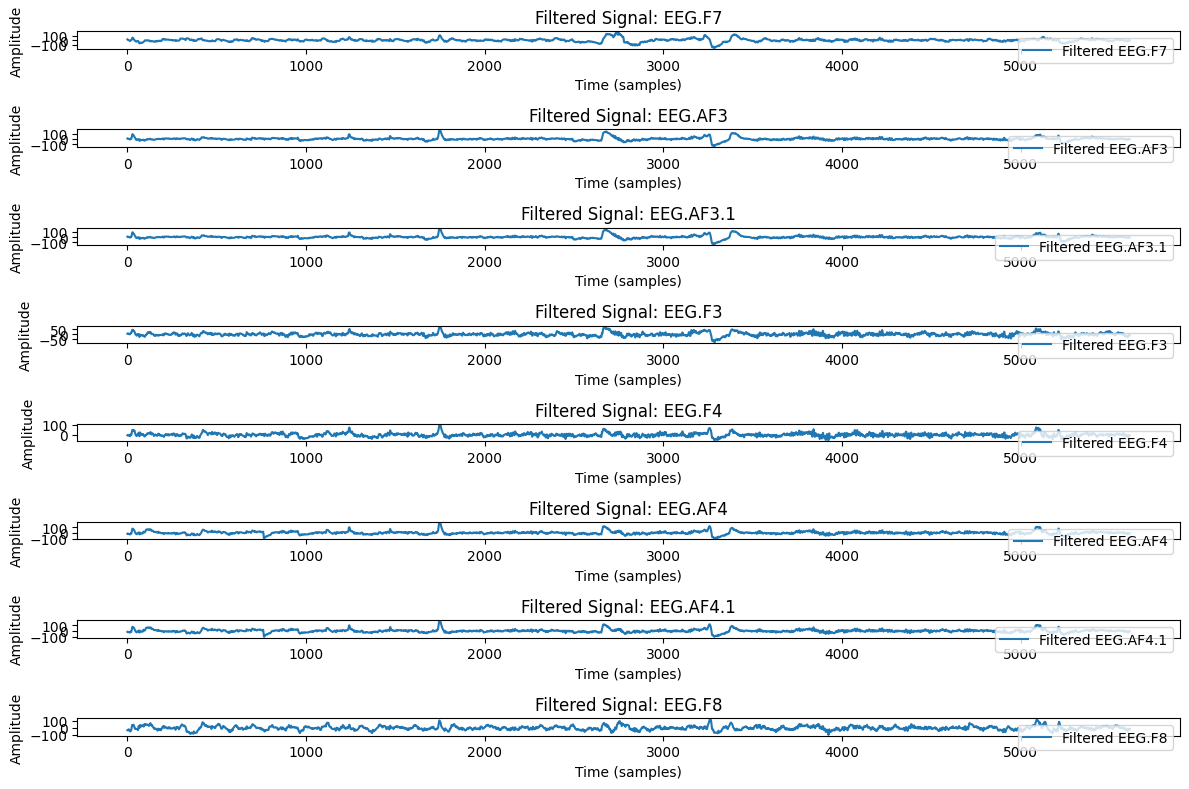

In [16]:

# Convert the filtered signals dictionary to a DataFrame for easier plotting
filtered_signals_df = pd.DataFrame(filtered_data)

# Plot the filtered signals for the first few EEG channels
plt.figure(figsize=(12, 8))

# Select a subset of channels to plot for clarity
channels_to_plot = eeg_columns[:8]  # Plot the first 3 EEG channels

for i, col in enumerate(channels_to_plot, 1):
    plt.subplot(len(channels_to_plot), 1, i)
    plt.plot(filtered_signals_df[col], label=f'Filtered {col}')
    plt.title(f'Filtered Signal: {col}')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


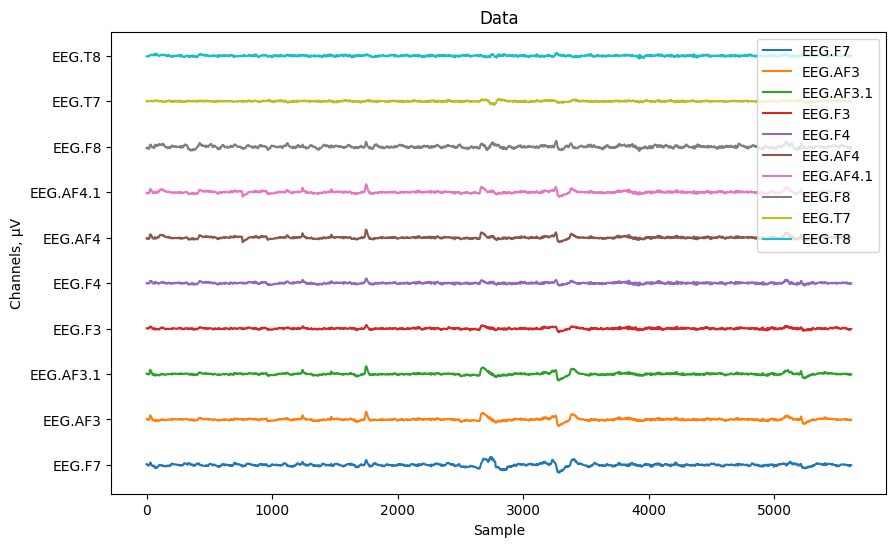

In [17]:
# Extract EEG channels from the DataFrame
channels = [col for col in filtered_signals_df.columns if col.startswith("EEG")]
d = filtered_signals_df[channels]
# Number of channels
n_channels = len(channels)

# Create the plot 
plt.figure(figsize=(10, 6))
for i, channel in enumerate(channels):
    plt.plot(d[channel] + 1000 * (i + 1), label=channel)

# Set y-ticks and labels
plt.yticks(range(1000, 1000 * (n_channels + 1), 1000), channels)

# Add labels and title
plt.ylabel('Channels, µV')
plt.xlabel('Sample')
plt.title("Data")
plt.legend(loc="upper right")
plt.show()


In [31]:
#pip install EMD-signal


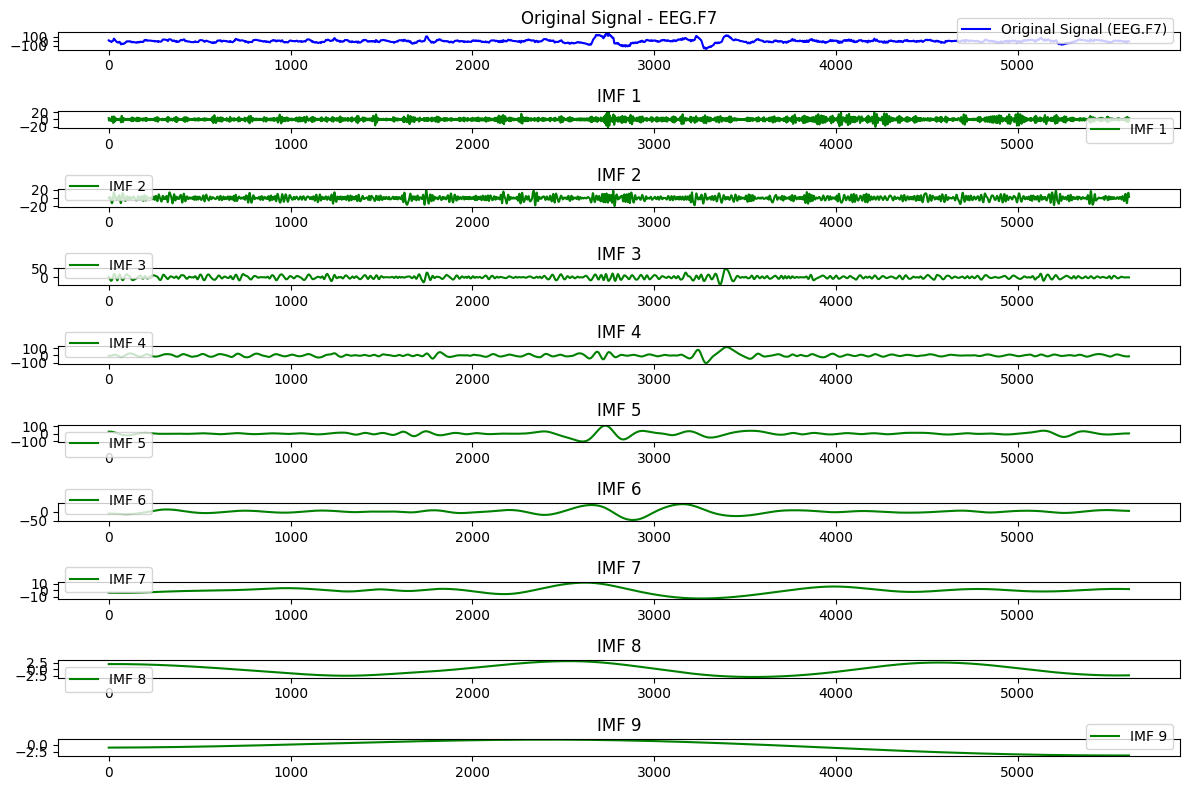

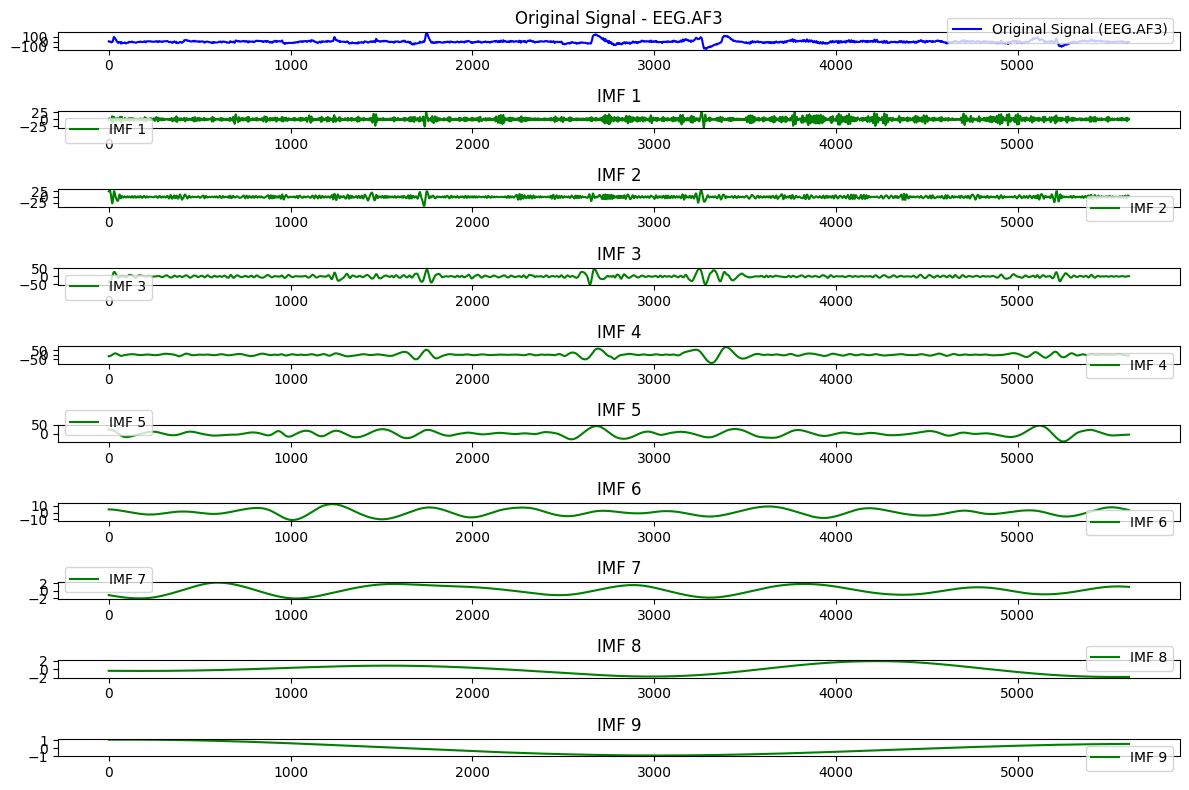

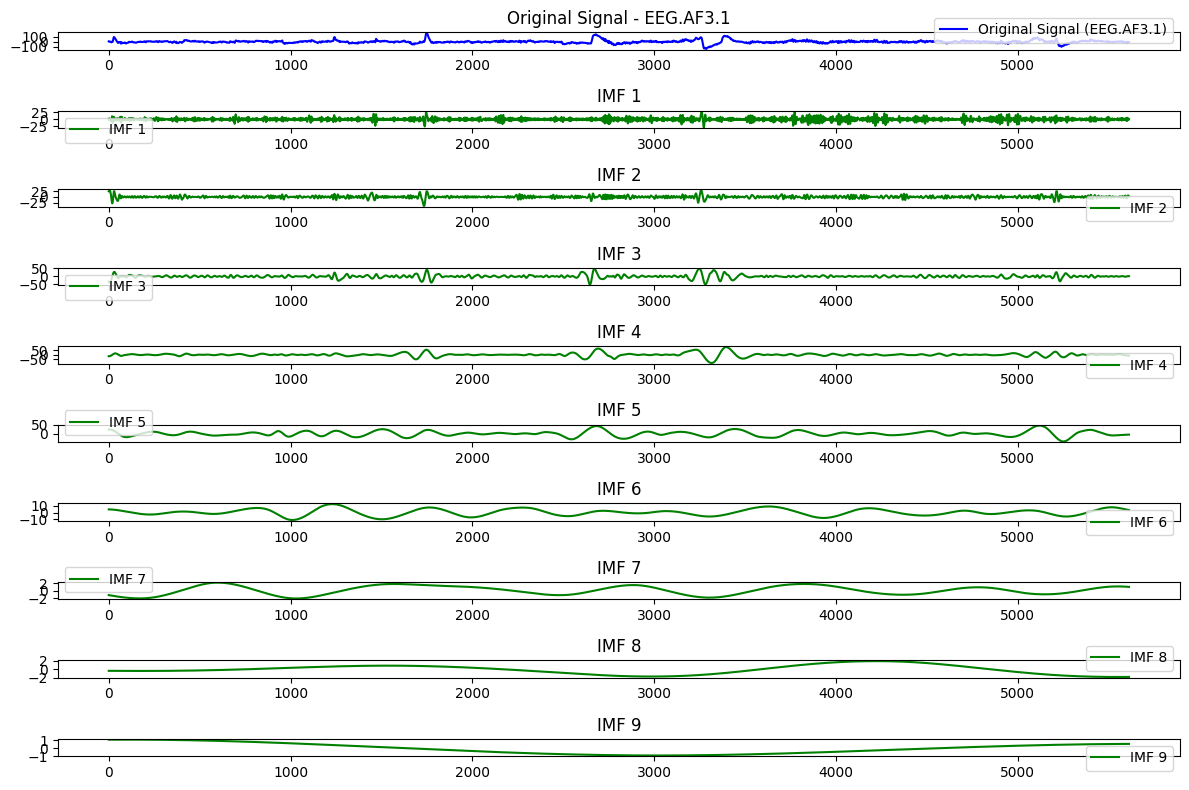

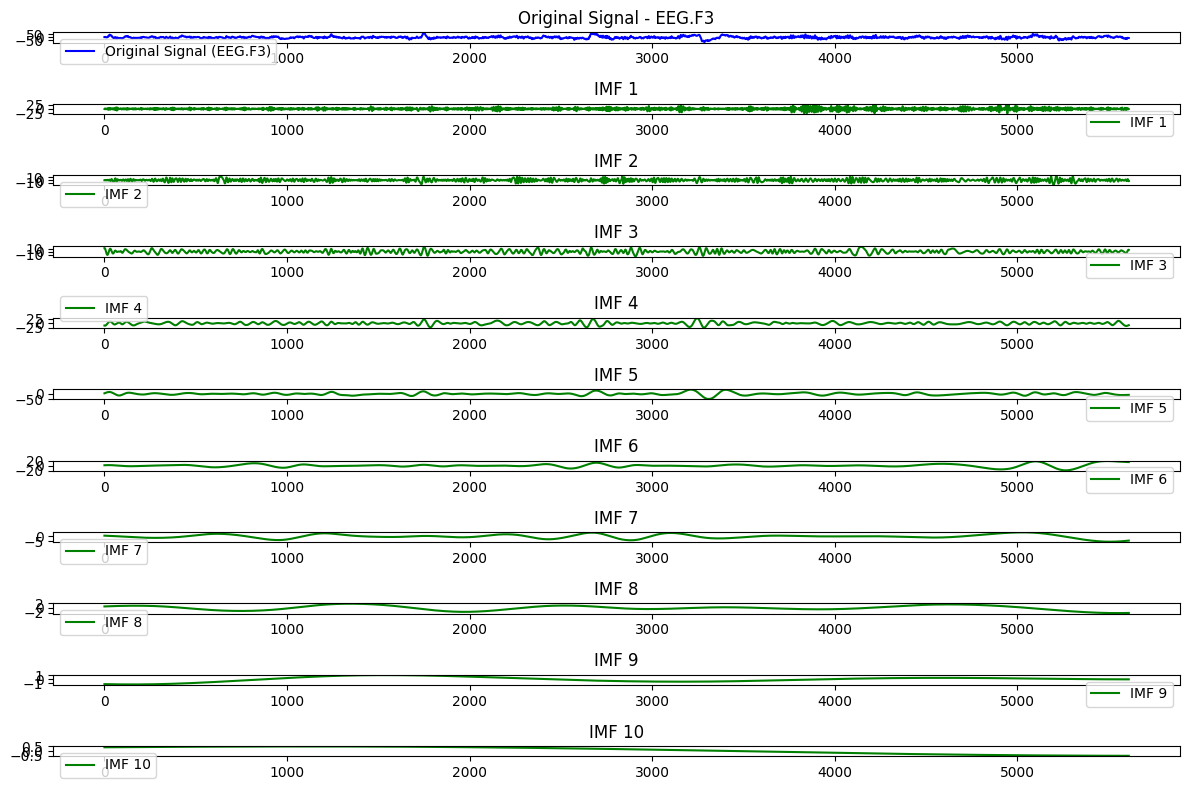

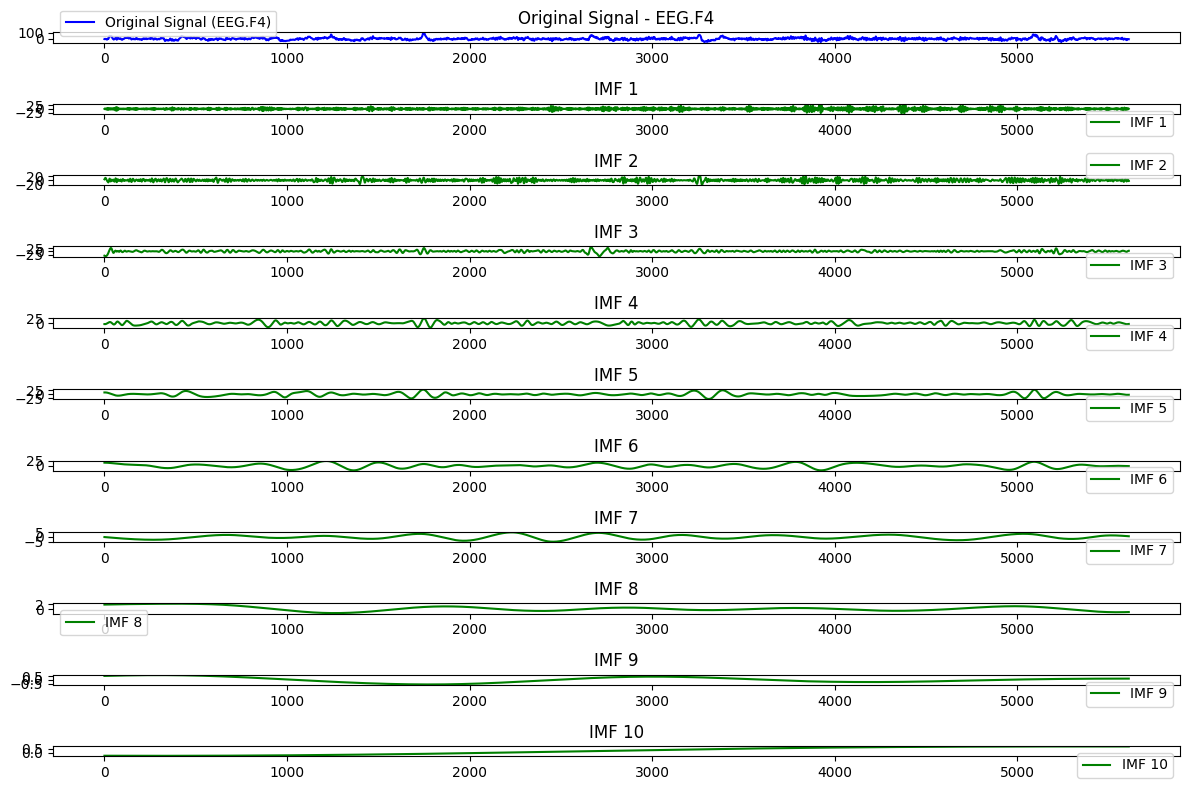

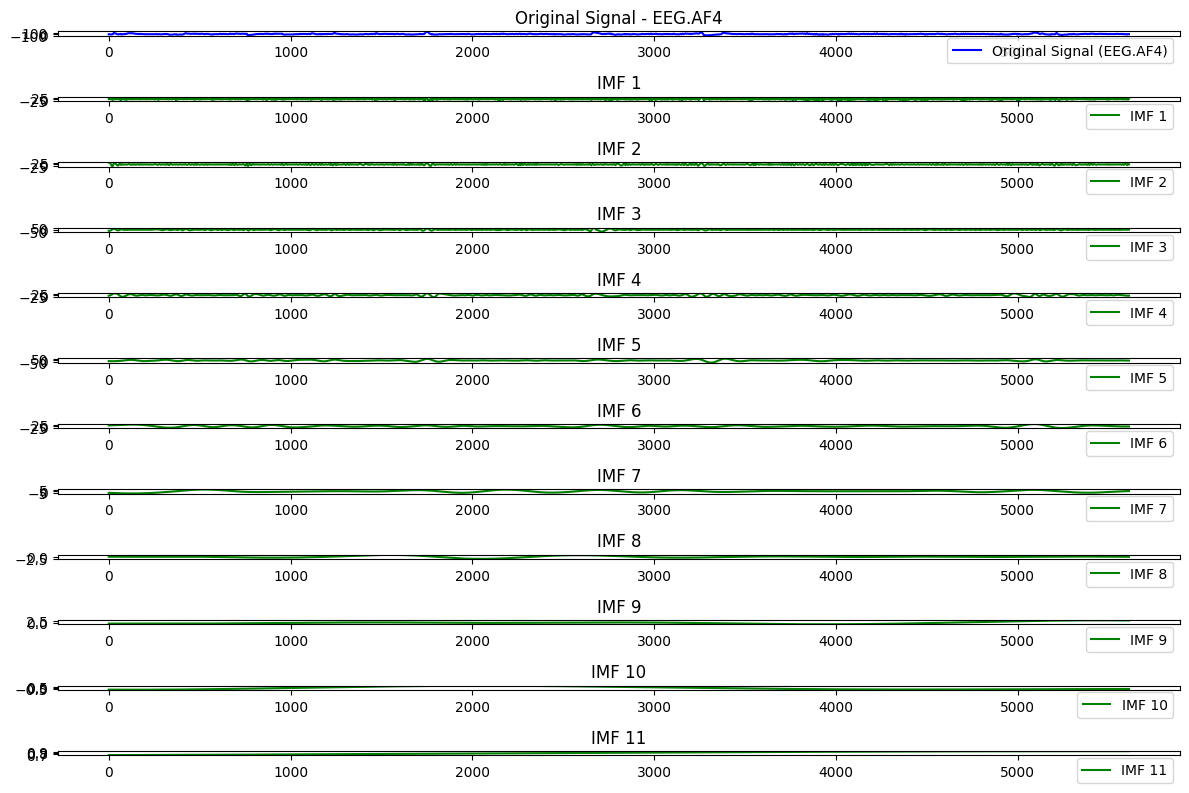

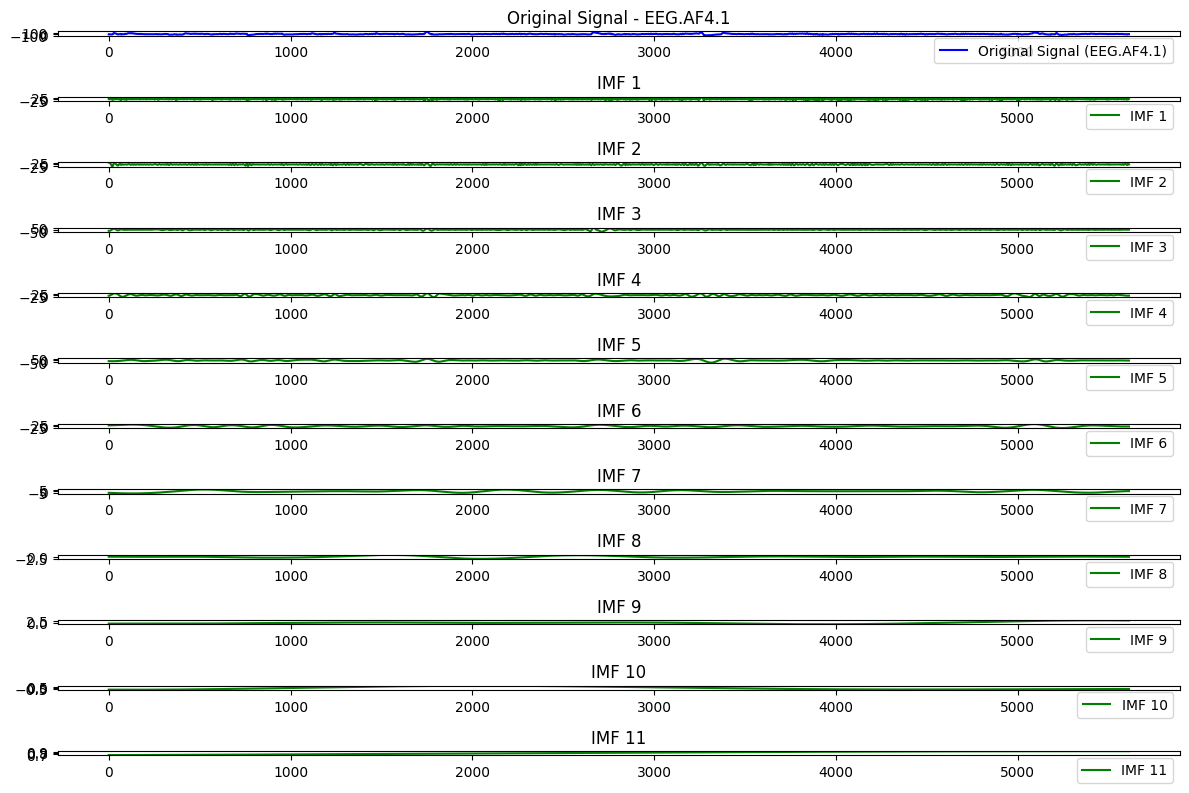

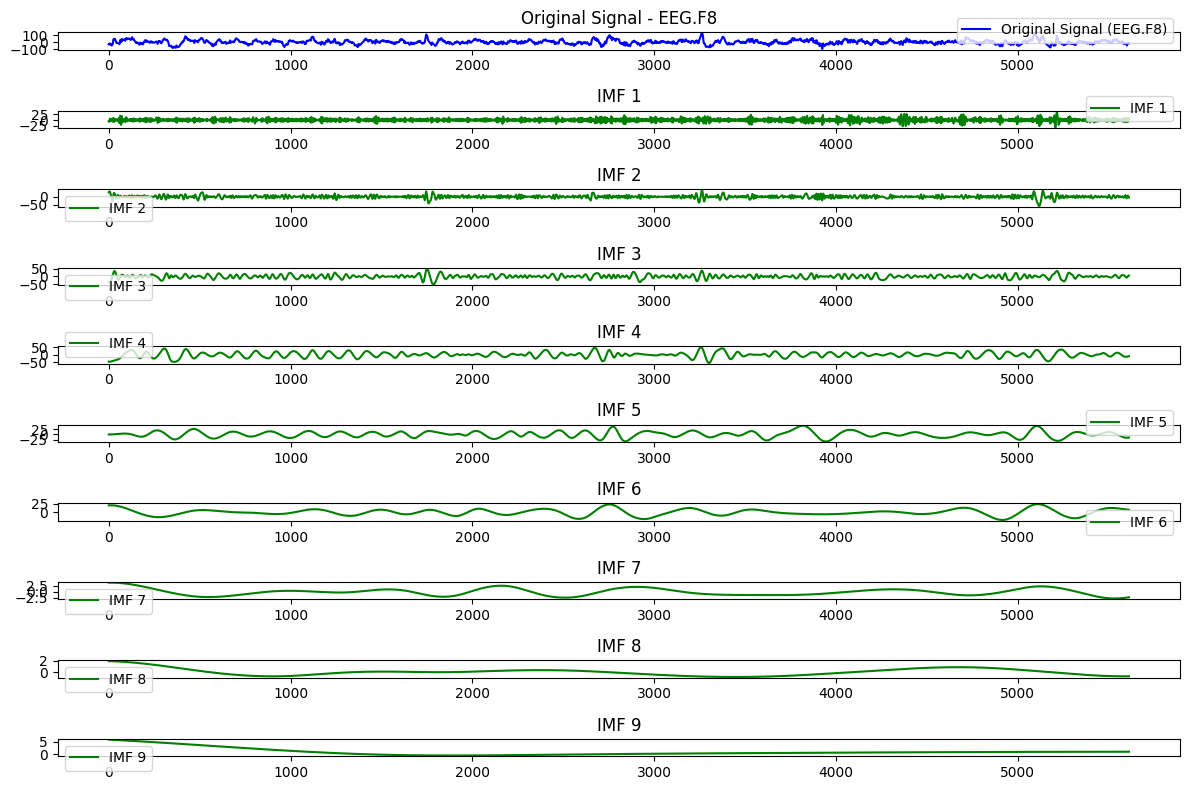

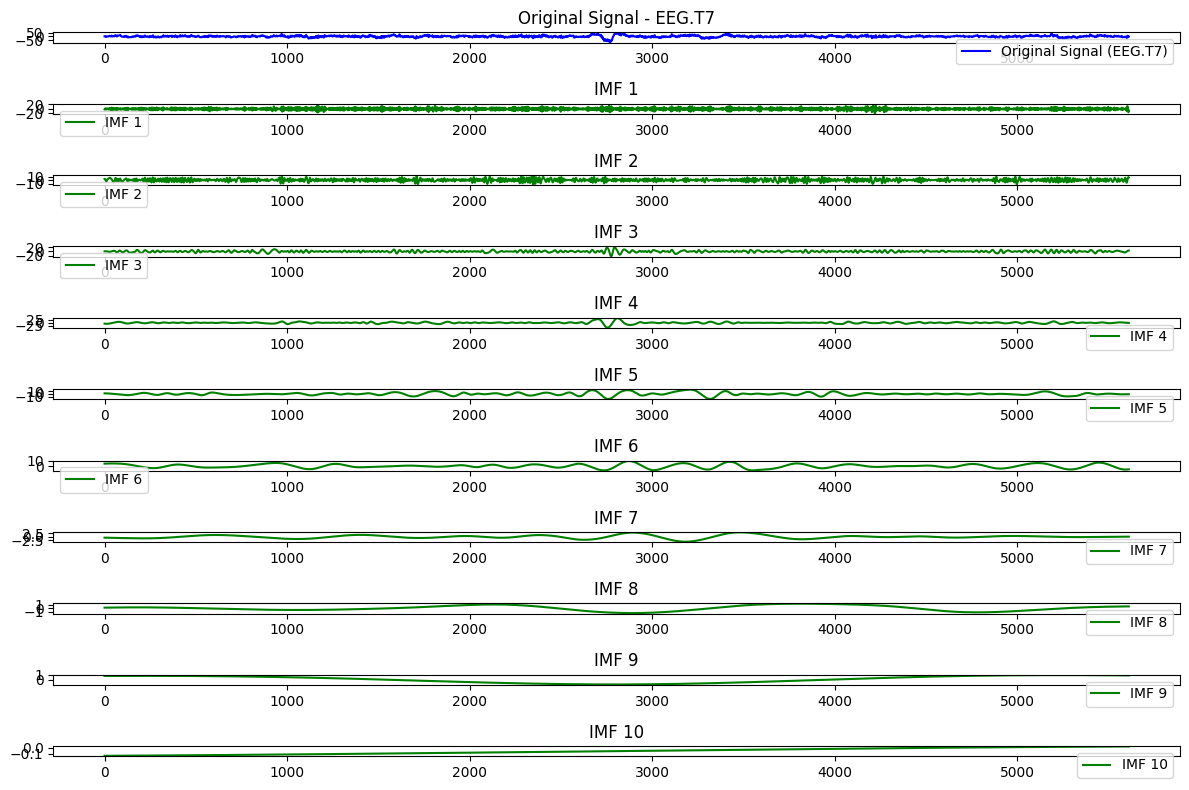

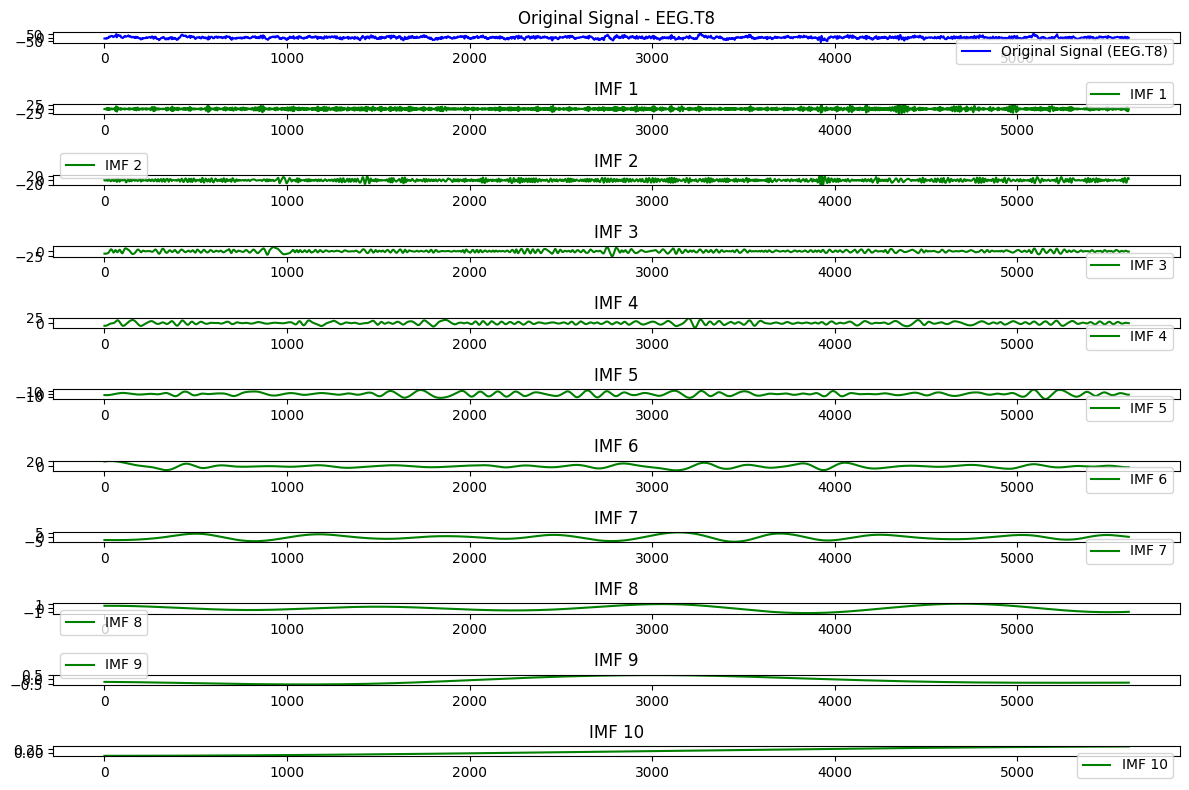

In [18]:
eeg_columns = [col for col in filtered_signals_df.columns if col.startswith("EEG")]

if not eeg_columns:
    raise ValueError("No columns starting with 'EEG' found in the dataset.")

# Function to apply EMD and visualize results
def perform_emd_on_signals(data, eeg_columns):
    for col in eeg_columns:
        signal = data[col].dropna().values  # Drop NaN values
        if len(signal) == 0:
            print(f"Skipping column '{col}' due to insufficient data.")
            continue
        
        emd = EMD()
        imfs = emd(signal)

        # Visualize the original signal and its IMFs
        plt.figure(figsize=(12, 8))
        plt.subplot(len(imfs) + 1, 1, 1)
        plt.plot(signal, label=f"Original Signal ({col})", color='blue')
        plt.title(f"Original Signal - {col}")
        plt.legend()

        for i, imf in enumerate(imfs):
            plt.subplot(len(imfs) + 1, 1, i + 2)
            plt.plot(imf, label=f"IMF {i + 1}", color='green')
            plt.title(f"IMF {i + 1}")
            plt.legend()

        plt.tight_layout()
        plt.show()

# Apply EMD for each EEG signal
perform_emd_on_signals(filtered_signals_df, eeg_columns)

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.fftpack import fft
from PyEMD import EMD
from scipy.integrate import simpson
from scipy.signal import welch
from scipy.stats import entropy

def extract_imf_features(signal, sampling_rate):
    """
    Extract features from the IMFs of an EEG signal.
    Features include energy, mean, variance, skewness, kurtosis, dominant frequency, and entropy.
    """
    emd = EMD()
    imfs = emd(signal)
    features = {}

    for i, imf in enumerate(imfs):
        # Energy
        energy = np.sum(imf**2)

        # Statistical Features
        mean = np.mean(imf)
        variance = np.var(imf)
        skewness = skew(imf)
        kurt = kurtosis(imf)
        
        # Frequency Features: Dominant Frequency
        fft_values = np.abs(fft(imf))
        freqs = np.fft.fftfreq(len(imf), 1 / sampling_rate)
        dominant_freq = freqs[np.argmax(fft_values[:len(freqs) // 2])]  # Frequency with highest FFT amplitude
        
        # Entropy Feature (Approximate Entropy)
        ApEn = entropy(imf)
        
        # Store features for this IMF
        features[f"IMF_{i+1}_energy"] = energy
        features[f"IMF_{i+1}_mean"] = mean
        features[f"IMF_{i+1}_variance"] = variance
        features[f"IMF_{i+1}_skewness"] = skewness
        features[f"IMF_{i+1}_kurtosis"] = kurt
        features[f"IMF_{i+1}_dominant_freq"] = dominant_freq
        features[f"IMF_{i+1}_ApEn"] = ApEn

    return features


def extract_eeg_features_from_imfs(data, eeg_columns, sampling_rate):
    """
    Extract IMF features for all EEG signals in the dataset.
    """
    all_features = []

    for col in eeg_columns:
        print(f"Extracting IMF features for {col}...")
        signal = data[col].values
        imf_features = extract_imf_features(signal, sampling_rate)
        imf_features["channel"] = col  # Add channel information
        all_features.append(imf_features)

    features_df = pd.DataFrame(all_features)
    return features_df

# Example Usage
sampling_rate = 256  # Replace with your EEG sampling rate
eeg_columns = [col for col in filtered_signals_df.columns if col.startswith("EEG")]

# Extract features from all EEG signals
features_df = extract_eeg_features_from_imfs(filtered_signals_df, eeg_columns, sampling_rate)

# Save the extracted features to a CSV file
features_df.to_csv("eeg_imf_features.csv", index=False)
print("Features saved to eeg_imf_features.csv")


Extracting IMF features for EEG.F7...
Extracting IMF features for EEG.AF3...
Extracting IMF features for EEG.AF3.1...
Extracting IMF features for EEG.F3...
Extracting IMF features for EEG.F4...
Extracting IMF features for EEG.AF4...
Extracting IMF features for EEG.AF4.1...
Extracting IMF features for EEG.F8...
Extracting IMF features for EEG.T7...
Extracting IMF features for EEG.T8...
Features saved to eeg_imf_features.csv


In [20]:
features_df


IMF_1_energy  IMF_1_mean  IMF_1_variance  IMF_1_skewness  IMF_1_kurtosis  \
0  107083.739919   -0.044712       19.079209       -0.053864        2.119817   
1  166136.552130   -0.083888       29.596768       -0.005594        3.137395   
2  166136.552130   -0.083888       29.596768       -0.005594        3.137395   
3  184703.748628   -0.093502       32.903543       -0.096250        2.747533   
4  211523.506409    0.015332       37.691053        0.006658        2.818856   
5  239808.867194    0.035029       42.730218        0.141442        3.187167   
6  239808.867194    0.035029       42.730218        0.141442        3.187167   
7  226983.087918    0.011065       40.445902        0.078951        2.019566   
8  104179.203765   -0.058572       18.560219       -0.041677        0.649660   
9  186051.480490    0.046939       33.150234        0.065551        1.559152   

   IMF_1_dominant_freq  IMF_1_ApEn   IMF_2_energy  IMF_2_mean  IMF_2_variance  \
0            22.352103        -inf  138129.260086   -0.045986       24.611082   
1            22.352103        -inf  171746.255952    0.049146       30.600980   
2            22.352103        -inf  171746.255952    0.049146       30.600980   
3            22.306486        -inf  107035.810896    0.013952       19.072473   
4            18.748396        -inf  156237.853367    0.048029       27.837653   
5            18.748396        -inf  155434.546401   -0.000281       27.696819   
6            18.748396        -inf  155434.546401   -0.000281       27.696819   
7            22.352103        -inf  389663.059665   -0.141316       69.413932   
8            36.401996        -inf   69800.549603   -0.004618       12.437710   
9            17.562366        -inf  138235.886626    0.074858       24.626593   

   ...  IMF_10_kurtosis  IMF_10_dominant_freq  IMF_10_ApEn  IMF_11_energy  \
0  ...              NaN                   NaN          NaN            NaN   
1  ...              NaN                   NaN          NaN            NaN   
2  ...              NaN                   NaN          NaN            NaN   
3  ...        -1.399619              0.045617         -inf            NaN   
4  ...        -1.583402              0.045617         -inf            NaN   
5  ...        -1.279833              0.045617         -inf     3672.84921   
6  ...        -1.279833              0.045617         -inf     3672.84921   
7  ...              NaN                   NaN          NaN            NaN   
8  ...        -1.347737              0.000000         -inf            NaN   
9  ...        -1.429703              0.045617         -inf            NaN   

   IMF_11_mean  IMF_11_variance  IMF_11_skewness  IMF_11_kurtosis  \
0          NaN              NaN              NaN              NaN   
1          NaN              NaN              NaN              NaN   
2          NaN              NaN              NaN              NaN   
3          NaN              NaN              NaN              NaN   
4          NaN              NaN              NaN              NaN   
5     0.802754          0.01005        -0.208667        -1.370712   
6     0.802754          0.01005        -0.208667        -1.370712   
7          NaN              NaN              NaN              NaN   
8          NaN              NaN              NaN              NaN   
9          NaN              NaN              NaN              NaN   

   IMF_11_dominant_freq  IMF_11_ApEn  
0                   NaN          NaN  
1                   NaN          NaN  
2                   NaN          NaN  
3                   NaN          NaN  
4                   NaN          NaN  
5                   0.0     8.624762  
6                   0.0     8.624762  
7                   NaN          NaN  
8                   NaN          NaN  
9                   NaN          NaN  

[10 rows x 78 columns]

In [21]:
# Replace -inf values with NaN
features_df.replace(-np.inf, np.nan, inplace=True)

# Select only the numeric columns
numeric_columns = features_df.select_dtypes(include=[np.number]).columns

# Handle missing values (impute with the mean of the column)
features_df[numeric_columns] = features_df[numeric_columns].fillna(features_df[numeric_columns].mean())

# If needed, drop rows that still have NaN values in non-numeric columns
features_df_cleaned = features_df.dropna(subset=["channel"])

# Save the cleaned dataframe to CSV
features_df_cleaned.to_csv("eeg_imf_features_cleaned.csv", index=False)

print("Cleaned features saved to eeg_imf_features_cleaned.csv")


Cleaned features saved to eeg_imf_features_cleaned.csv


In [22]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Separate the numeric features (exclude non-numeric columns like "channel" if present)
numeric_features = features_df_cleaned.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(numeric_features)

# Create a DataFrame for the standardized features
standardized_features_df = pd.DataFrame(standardized_features, columns=numeric_features.columns)

# Combine standardized features with non-numeric columns (if any)
non_numeric_features = features_df_cleaned.select_dtypes(exclude=['float64', 'int64'])
if not non_numeric_features.empty:
    standardized_features_df = pd.concat([non_numeric_features.reset_index(drop=True), standardized_features_df], axis=1)

# Save the standardized DataFrame to a new CSV file
standardized_features_df



c:\Users\alsho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\alsho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\alsho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


channel  IMF_1_energy  IMF_1_mean  IMF_1_variance  IMF_1_skewness  \
0     EEG.F7     -1.632658   -0.424221       -1.632290       -1.000273   
1    EEG.AF3     -0.366694   -1.159723       -0.367094       -0.372979   
2  EEG.AF3.1     -0.366694   -1.159723       -0.367094       -0.372979   
3     EEG.F3      0.031346   -1.340219        0.030691       -1.551105   
4     EEG.F4      0.606303    0.703076        0.606598       -0.213753   
5    EEG.AF4      1.212680    1.072891        1.212778        1.537837   
6  EEG.AF4.1      1.212680    1.072891        1.212778        1.537837   
7     EEG.F8      0.937723    0.622971        0.937989        0.725727   
8     EEG.T7     -1.694925   -0.684433       -1.694722       -0.841900   
9     EEG.T8      0.060239    1.296490        0.060366        0.551588   

   IMF_1_kurtosis  IMF_1_dominant_freq  IMF_1_ApEn  IMF_2_energy  IMF_2_mean  \
0       -0.414735             0.031369         NaN     -0.338410   -0.851099   
1        0.839227             0.031369         NaN      0.079574    0.760151   
2        0.839227             0.031369         NaN      0.079574    0.760151   
3        0.358799             0.022406         NaN     -0.725017    0.164076   
4        0.446691            -0.676673         NaN     -0.113253    0.741226   
5        0.900561            -0.676673         NaN     -0.123241   -0.076999   
6        0.900561            -0.676673         NaN     -0.123241   -0.076999   
7       -0.538275             0.031369         NaN      2.789089   -2.465688   
8       -2.226412             2.791836         NaN     -1.187990   -0.150446   
9       -1.105644            -0.909699         NaN     -0.337084    1.195628   

   ...  IMF_10_kurtosis  IMF_10_dominant_freq  IMF_10_ApEn  IMF_11_energy  \
0  ...     2.752711e-15              0.000000          NaN   4.547474e-13   
1  ...     2.752711e-15              0.000000          NaN   4.547474e-13   
2  ...     2.752711e-15              0.000000          NaN   4.547474e-13   
3  ...    -1.603063e-01              0.577350          NaN   4.547474e-13   
4  ...    -2.438680e+00              0.577350          NaN   4.547474e-13   
5  ...     1.324688e+00              0.577350          NaN   4.547474e-13   
6  ...     1.324688e+00              0.577350          NaN   4.547474e-13   
7  ...     2.752711e-15              0.000000          NaN   4.547474e-13   
8  ...     4.828790e-01             -2.886751          NaN   4.547474e-13   
9  ...    -5.332675e-01              0.577350          NaN   4.547474e-13   

    IMF_11_mean  IMF_11_variance  IMF_11_skewness  IMF_11_kurtosis  \
0  1.110223e-16              0.0              0.0     2.220446e-16   
1  1.110223e-16              0.0              0.0     2.220446e-16   
2  1.110223e-16              0.0              0.0     2.220446e-16   
3  1.110223e-16              0.0              0.0     2.220446e-16   
4  1.110223e-16              0.0              0.0     2.220446e-16   
5  1.110223e-16              0.0              0.0     2.220446e-16   
6  1.110223e-16              0.0              0.0     2.220446e-16   
7  1.110223e-16              0.0              0.0     2.220446e-16   
8  1.110223e-16              0.0              0.0     2.220446e-16   
9  1.110223e-16              0.0              0.0     2.220446e-16   

   IMF_11_dominant_freq  IMF_11_ApEn  
0                   0.0          0.0  
1                   0.0          0.0  
2                   0.0          0.0  
3                   0.0          0.0  
4                   0.0          0.0  
5                   0.0          0.0  
6                   0.0          0.0  
7                   0.0          0.0  
8                   0.0          0.0  
9                   0.0          0.0  

[10 rows x 78 columns]

In [23]:
# Calculate 'arousal' and 'variance' from the features
def create_arousal_and_variance(df):
    # Calculate arousal (mean of the first 5 IMF means)
    df['arousal'] = df[['IMF_1_mean', 'IMF_2_mean', 'IMF_3_mean', 'IMF_4_mean', 'IMF_5_mean']].mean(axis=1)
    
    # Calculate variance (mean of the first 5 IMF variances)
    df['variance'] = df[['IMF_1_variance', 'IMF_2_variance', 'IMF_3_variance', 'IMF_4_variance', 'IMF_5_variance']].mean(axis=1)
    
    return df

# Apply the function
features_df_cleaned = create_arousal_and_variance(features_df_cleaned)

# Check the new 'arousal' and 'variance' columns
print(features_df_cleaned[['arousal', 'variance']].head())


    arousal    variance
0  0.133036  223.071978
1 -0.056910  136.188574
2 -0.056910  136.188574
3 -0.072995   47.431772
4 -0.125343   46.171198


In [25]:
def create_emotion_labels(df):
    # Define thresholds for arousal and variance
    df['emotion_label'] = 'Neutral'  # Default label in case no condition matches

    # Define conditions for emotion labels based on arousal and variance
    df.loc[(df['arousal'] < 0) & (df['variance'] < 50), 'emotion_label'] = 'Sad'     # Low arousal and low variance
    df.loc[(df['arousal'] > 0) & (df['variance'] < 50), 'emotion_label'] = 'Happy'   # High arousal and low variance
    df.loc[(df['arousal'] < 0) & (df['variance'] > 50), 'emotion_label'] = 'Calm'    # Low arousal and high variance
    df.loc[(df['arousal'] > 0) & (df['variance'] > 50), 'emotion_label'] = 'Scared'  # High arousal and high variance

    return df

# Apply the function to create emotion labels
features_df_cleaned = create_emotion_labels(features_df_cleaned)

# Check the new labels
print(features_df_cleaned[['arousal', 'variance', 'emotion_label']].head())


    arousal    variance emotion_label
0  0.133036  223.071978        Scared
1 -0.056910  136.188574          Calm
2 -0.056910  136.188574          Calm
3 -0.072995   47.431772           Sad
4 -0.125343   46.171198           Sad


In [26]:
X = features_df_cleaned.drop(columns=['channel', 'emotion_label'])  # Features (drop non-numeric columns)
y = features_df_cleaned['emotion_label']  # Target: emotion label
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")


Data split into training and testing sets.


In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the emotion labels
y_encoded = label_encoder.fit_transform(y)  # y contains the emotion labels

# Check the encoded labels
print("Encoded Emotion Labels:", y_encoded)


Encoded Emotion Labels: [3 0 0 2 2 0 0 0 2 1]
